# Regressão Linear

Vamos utilizar 2 Datasets diferentes, porém ambos datasets voltados para preços de imóveis.

O primeiro conjunto de dados pode ser encontrado originalmente no [kaggle](https://www.kaggle.com/datasets/gunhee/koreahousedata). Porém os dados que usaremos foram já alterados para facilitar as nossas análises. Este dataset será usado desde a atividade 1 até a ativade 8.

O segundo conjunto de dados é bem famoso para quem começa na área de Machine Learning, o Californa Housing, um conjunto de dados que apresenta algumas caracteristicas sobre os preços dos apartementos na California, um pouco sobre ele também pode ser lido no [Kaggle](https://www.kaggle.com/datasets/harrywang/housing)

Para baixar o **Primeiro dataset**, pode utilizar o seguinte Link: [Dataset Apartamentos](https://docs.google.com/spreadsheets/d/1wwGqVAd9V5_3R46_AHcCwXrA8K_CDeXO/edit?usp=drive_link&ouid=100426007660566789550&rtpof=true&sd=true)

# Regressão Linear Simples

## 1: Importe os dados e verifique se há dados faltantes.

In [ ]:
# Importar pacotes
import pandas as pd
import numpy as np

In [ ]:
# Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar dados

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_precos_apartamentos.xlsx')
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,1,1,0,1,0,2,2,1,2
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,6,2,0,1,0,4,3,5,5


In [ ]:
# Verificar Nulos
pd.isna(df).sum()

preco                              0
ano_construcao                     0
ano_Venda                          0
m2                                 0
andar                              0
tipo_Aquecimento                   0
tempo_ate_onibus                   0
tempo_ate_metro                    0
qtde_elevadores                    0
qtde_escritorios_publicos_perto    0
qtde_hospitais_perto               0
qtde_lojas_departamento_perto      0
qtde_shoppings_perto               0
qtde_estacionamentos_perto         0
qtde_escolas_fundamental1_perto    0
qtde_escolas_fundamental2_perto    0
qtde_escolas_medio_perto           0
qtde_universidades_perto           0
dtype: int64

## 2: Selecione apenas as variáveis `preco` e `m2`, aplique o logaritmo natural na variável `m2` e verifique a correlação entre as variáveis.

In [ ]:
# Selecionando variáveis preco e m2

df_filtro = df[['preco','m2']]
df_filtro.head()

,preco,m2
0,849552,75.623042
1,307962,54.534061
2,292032,54.534061
3,2283180,191.008568
4,1327428,163.602183


In [ ]:
# Selecionando variáveis preco e m2 e criar uma cópia do dataframe
df_filtro = df[['preco', 'm2']].copy()

# Aplicar logaritmo natural na variável m2 e substituir os valores
df_filtro.loc[:, 'm2'] = np.log(df_filtro['m2'])

df_filtro.head()

,preco,m2
0,849552,4.325761
1,307962,3.998825
2,292032,3.998825
3,2283180,5.252318
4,1327428,5.097438


In [ ]:
# Calculando a correlação entre as variáveis 'preco' e 'm2'
correlacao = df_filtro[['preco', 'm2']].corr()

# Exibindo a correlação
print(correlacao)

          preco        m2
preco  1.000000  0.706048
m2     0.706048  1.000000


## 3: Crie um modelo de regressão linear simples e encontre os coeficientes do modelo.

In [ ]:
# Importar statsmodels
import statsmodels.api as sm

In [ ]:
# Separar as variáveis X e y

X = df_filtro['m2']
y = df_filtro['preco']

# Adicionar termo constante

X = sm.add_constant(X)

# Estimar o modelo de regressão linear

modelo1 = sm.OLS(y, X).fit()

# Estatísticas do modelo

print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5854.
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:11:09   Log-Likelihood:                -85068.
No. Observations:                5891   AIC:                         1.701e+05
Df Residuals:                    5889   BIC:                         1.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.37e+06   6.17e+04    -54.642      0.0

In [ ]:
modelo1.params

const   -3.370460e+06
m2       1.066759e+06
dtype: float64

In [ ]:
# Prever valores de X
y_pred1 = modelo1.predict(X)

# Calcular os resíduos
res1 = y - y_pred1

## 4: Verifique os pressupostos da regressão linear.

Linearidade

In [ ]:
import seaborn as sns

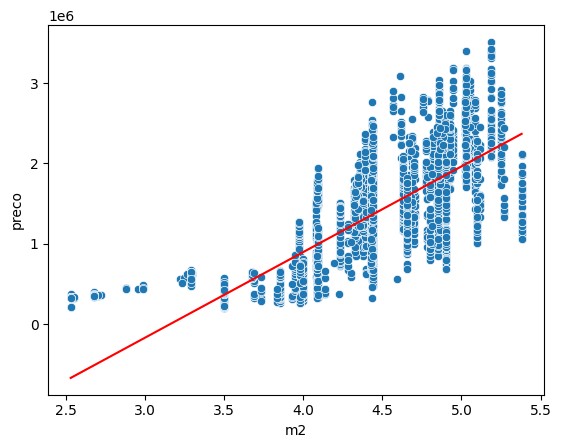

In [ ]:
# Gráfico de dispersão
sns.scatterplot(data=df_filtro, y='preco', x='m2');
sns.lineplot(x=df_filtro['m2'], y=y_pred1, color='red');

Homocedasticidade

Vamos checar a homocedasticidade com um teste de hipótese: Goldfeld Quandt. Este teste pode ser realizado importando-se a função `statsmodels.stats.api.het_goldfeldquandt()`.

Neste teste, a hipótese nula é de que há homocedasticidade.

In [ ]:
from statsmodels.stats.api import het_goldfeldquandt

stat, p_valor, _ = het_goldfeldquandt(res1, X)
p_valor

3.4232536086860795e-22

**Resposta:** Como o ***p-valor é muito próximo de zero***, indica que a hipótese nula pode ser rejeitada e que a variância dos resíduos não é constante.

Normalidade dos Resíduos

Vamos checar a normalidadde dos resíduos usando o teste de hipóteses de Shapiro-Wilk. Neste caso, a hipótese nula é que a amostra segue distribuição normal. Podemos realizar este teste importando a função `scipy.stats.shapiro()`.

In [ ]:
from scipy.stats import shapiro

stat, p_valor = shapiro(res1)
p_valor

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


7.838917594454599e-26

**Resposta:** p-valor menor que 0.05, podemos rejeitar a hipótese nula. Temos evidência de que os resíduos não seguem uma distribuição normal.

Autocorrelação dos Resíduos

Para checar se há autocorrelação entre os resíduos vamos usar o teste de hipótese de Durbin Watson. Ele pode ser importado do `statsmodels` com a sintaxe `statsmodels.stats.stattolls.durbin_watons()`.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res1)

0.7433704819691179

Para decidirmor se há ou não autocorrelação dos resíduos, devemos observar o valor do teste. Valores entre 1.5 e 2.5 indicam que não há autocorrelação, valores fora dessa faixa indicam que há autocorrelação.

**Resposta:** Podemos observar que o valor está entre 0 e 1, indicando que há autocorrelação.

Multicolinearidade



**Resposta:** Não é preciso checar a multicolinearidade, pois só temos uma variável preditora.

# Regressão Linear Múltipla

## 5: Crie um modelo de regressão linear múltipla.

Para facilitar o trabalho, vamos deixar um pré processamento pronto.

In [ ]:
# Importar os dados

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_precos_apartamentos.xlsx')
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,1,1,0,1,0,2,2,1,2
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,6,2,0,1,0,4,3,5,5


In [ ]:
# Vamos condensar algumas variáveis em uma única
df['qtde_servicos'] = df['qtde_hospitais_perto'] + \
                      df['qtde_lojas_departamento_perto'] + \
                      df['qtde_escritorios_publicos_perto'] + \
                      df['qtde_escolas_fundamental1_perto'] + \
                      df['qtde_escolas_fundamental2_perto'] + \
                      df['qtde_escolas_medio_perto'] + \
                      df['qtde_universidades_perto']

# excluindo as variáveis originais do DataFrame
df.drop(['qtde_hospitais_perto','qtde_lojas_departamento_perto',
         'qtde_escritorios_publicos_perto','qtde_escolas_fundamental1_perto',
         'qtde_escolas_fundamental2_perto','qtde_escolas_medio_perto',
         'qtde_universidades_perto'],
        axis=1, inplace=True)

In [ ]:
# criando nova variável
df['qtde_conveniencia'] = df['qtde_shoppings_perto'] + df['qtde_estacionamentos_perto']

# excluindo variáveis do DataFrame
df.drop(['qtde_shoppings_perto','qtde_estacionamentos_perto'],
        axis=1, inplace=True)

df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_servicos,qtde_conveniencia
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,13,1
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,12,2
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,12,2
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,9,1
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,25,1


In [ ]:
# aplicando One Hot Encoding à variável tipo_Aquecimento
df_aux = pd.get_dummies(df['tipo_Aquecimento'], prefix='tipo_Aquecimento')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tipo_Aquecimento', 'tipo_Aquecimento_central'], axis=1, inplace=True)

In [ ]:
# aplicando One Hot Encoding à variável tempo_ate_onibus
df_aux = pd.get_dummies(df['tempo_ate_onibus'], prefix='tempo_ate_onibus')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_onibus', 'tempo_ate_onibus_10min~15min'], axis=1, inplace=True)

In [ ]:
# aplicando One Hot Encoding à variável tempo_ate_metro
df_aux = pd.get_dummies(df['tempo_ate_metro'], prefix='tempo_ate_metro')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_metro', 'tempo_ate_metro_no_bus_stop_nearby'], axis=1, inplace=True)
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,849552,2006,2007,75.623042,3,0,13,1,True,False,True,False,True,False,False
1,307962,1985,2007,54.534061,8,2,12,2,True,True,False,False,False,False,True
2,292032,1985,2007,54.534061,6,2,12,2,True,True,False,False,False,False,True
3,2283180,2006,2007,191.008568,8,11,9,1,True,True,False,True,False,False,False
4,1327428,1993,2007,163.602183,3,20,25,1,True,True,False,False,False,True,False


In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Separar as variáveis independentes X e a variável dependente y
X = df.drop(columns=['preco'])
y = df['preco']

In [ ]:
# Aplicar o StandardScaler em X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adicionar a constante ao modelo de regressão linear múltipla
X_scaled = sm.add_constant(X_scaled)

# Ajustar o modelo
modelo2 = sm.OLS(y, X_scaled).fit()

# Exibir os resultados
print(modelo2.summary())

# Prever valores para X
y_pred2 = modelo2.predict(X_scaled)

# Calcular os resíduos
res2 = y - y_pred2

# Exibir os resíduos
print("Resíduos:", res2.head())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2000.
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:32:11   Log-Likelihood:                -81941.
No. Observations:                5891   AIC:                         1.639e+05
Df Residuals:                    5876   BIC:                         1.640e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+06   3467.684    382.765      0.0

## 6: Faça a previsão do preço de um apartamento com as seguinte características:
* `ano_construcao = 2000`
* `ano_Venda = 2003`
* `m2 = 83`
* `andar = 2`
* `qtde_elevadores = 1`
* `qtde_servicos = 4`
* `qtde_conveniencia = 2`
* `tipo_Aquecimento_individual = 1`
* `tempo_ate_onibus_0~5min = 0`
* `tempo_ate_onibus_5min~10min = 1`
* `tempo_ate_metro_0-5min = 1`
* `tempo_ate_metro_10min~15min = 0`
* `tempo_ate_metro_15min~20min = 0`
* `tempo_ate_metro_5min~10min = 0`

In [ ]:
# Características fornecidas

novos_dados = pd.DataFrame({
    'ano_construcao': [2000],
    'ano_Venda': [2003],
    'm2': [83],
    'andar': [2],
    'qtde_elevadores': [1],
    'qtde_servicos': [4],
    'qtde_conveniencia': [1],
    'tipo_Aquecimento_individual': [1],
    'tempo_ate_onibus_0~5min': [0],
    'tempo_ate_onibus_5min~10min': [1],
    'tempo_ate_metro_0-5min': [1],
    'tempo_ate_metro_10min~15min': [0],
    'tempo_ate_metro_15min~20min': [0],
    'tempo_ate_metro_5min~10min': [0]
})

# Aplicar o StandardScaler nos novos dados
novos_dados_scaled = scaler.transform(novos_dados)

# Verificar as dimensões
print(f"Dimensões dos novos dados escalados: {novos_dados_scaled.shape}")
print(f"Dimensões dos dados usados no modelo: {X_scaled.shape}")

# Adicionar a constante aos novos dados escalados
novos_dados_scaled = sm.add_constant(novos_dados_scaled, has_constant='add')

# Prevendo o preço do apartamento
previsao_preco = modelo2.predict(novos_dados_scaled)
print(f"Previsão do preço do apartamento: {previsao_preco[0]}")

Dimensões dos novos dados escalados: (1, 14)
Dimensões dos dados usados no modelo: (5891, 15)
Previsão do preço do apartamento: 573001.4828198509


**Resposta**: Com as características fornecidas a previsão do preço do apartamento é de R$ 573.001,00.

A remoção da variável independente x7 (qtde_servicos) impactou nos resultados de R-squared (diminuição pouco significante) e F-statistic (aumento pouco significante). Após a remoção da variável, foi verificado que o houve uma mudança considerável (-19,52%) no preço calculado para o apartamento. Por isso, a variável foi mantida no modelo, dado o seu alto impacto no resultado das previsões.

## 7: Verifique os pressupostos do modelo.

In [ ]:
from statsmodels.stats.api import het_goldfeldquandt
from scipy.stats import shapiro
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

Homocedasticidade dos Resíduos

In [ ]:
# Teste de Goldfeld-Quandt
stat, p_valor, _ = het_goldfeldquandt(res2, X_scaled)
print(f"Teste de Goldfeld-Quandt p-valor: {p_valor}")

Teste de Goldfeld-Quandt p-valor: 1.1901268230241252e-57


**Resposta:** p-valor menor que 0.05, podemos rejeitar a hipótese nula. O resultado sugere fortemente a presença de heterocedasticidade nos resíduos do modelo. Sugestão: utilizar erros padrão robustos.

Normalidade dos Reíduos

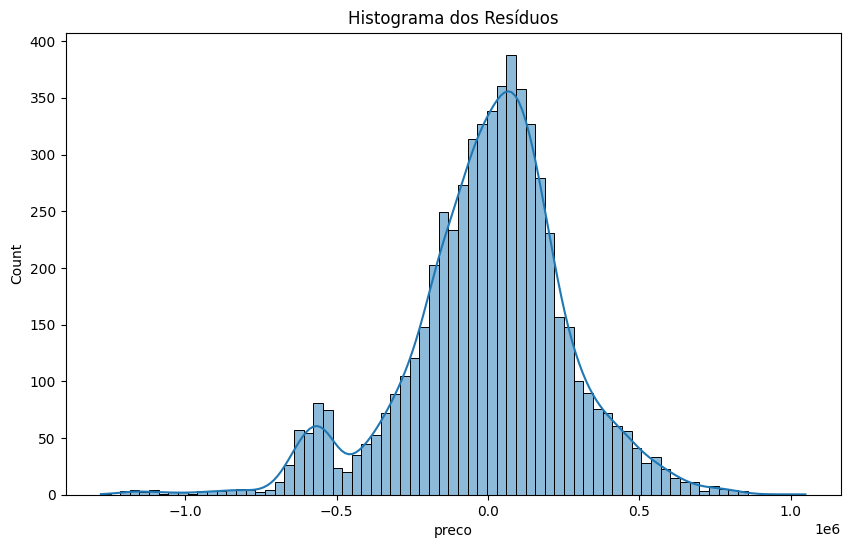

In [ ]:
# Histograma dos Resíduos
plt.figure(figsize=(10, 6))
sns.histplot(res2, kde=True)
plt.title('Histograma dos Resíduos')
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Teste de Shapiro-Wilk p-valor: 1.2338423639140534e-31


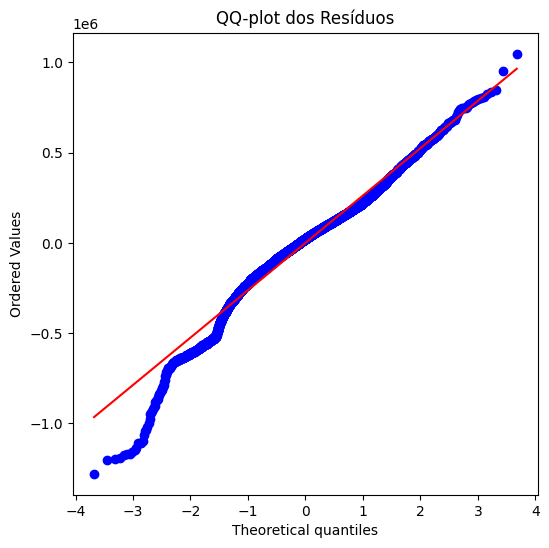

In [ ]:
stat, p_valor = stats.shapiro(res2)
print(f"Teste de Shapiro-Wilk p-valor: {p_valor}")

plt.figure(figsize=(6, 6))
stats.probplot(res2, dist="norm", plot=plt)
plt.title('QQ-plot dos Resíduos')
plt.show()

**Resposta:**

Teste de Shapiro-Wilk

p-valor: 1.2338423639140534e-31
Como o p-valor é menor que 0.05, rejeitamos a hipótese nula, indicando que os resíduos não seguem uma distribuição normal.

Histograma dos Resíduos
A distribuição dos resíduos aparenta ser aproximadamente normal, mas apresenta uma leve assimetria.

QQ-Plot dos Resíduos
O QQ-Plot mostra que os resíduos seguem razoavelmente uma linha reta, sugerindo uma distribuição aproximadamente normal, embora haja algumas discrepâncias nas extremidades.

Embora o teste de Shapiro-Wilk indique que os resíduos não são normalmente distribuídos, isso não invalida o modelo. No entanto, é aconselhável ter cautela ao interpretar os resultados, especialmente no que diz respeito aos intervalos de confiança e testes de hipótese.

Sugestão: Considerar o uso de erros padrão robustos.

Autocorrelação dos Resíduos

In [ ]:
# Teste de Durbin-Watson
dw_stat = durbin_watson(res2)
print(f"Estatística de Durbin-Watson: {dw_stat}")

Estatística de Durbin-Watson: 0.9769517207167945


**Resposta:**
Estatística de Durbin-Watson

Valor obtido: 0.9769517207167945
Esse valor indica a presença de autocorrelação positiva nos resíduos, o que pode ser uma preocupação para a validade do modelo.

Foi realizado um teste que confirmou a existência de autocorrelação entre as variáveis de tempo até o ônibus.

Remoção da Variável "tempo_ate_onibus_5min~10min"
Um teste foi feito removendo essa variável do modelo. Embora essa remoção tenha ajudado a reduzir a multicolinearidade, ela afetou significativamente o desempenho do modelo na previsão de preços. Portanto, decidiu-se manter a variável no modelo.

Conclusão
A estatística de Durbin-Watson próxima de 1 sugere a presença de autocorrelação positiva nos resíduos do modelo, indicando que os resíduos sucessivos estão correlacionados. Isso pode comprometer a validade das inferências do modelo.

Recomendações

Incluir Variáveis de Tempo: Se os dados possuem uma ordem temporal, considerar a inclusão de variáveis de tempo ou defasagens.
Modelos de Regressão com Erros Correlacionados: Utilizar modelos que ajustam diretamente a autocorrelação nos resíduos.
Métodos de Estimação Robustos: Ajustar o modelo usando métodos robustos que considerem a autocorrelação.
Documentar essas conclusões é importante para manter um registro claro dos achados e suas implicações no modelo.

Multicolinearidade

**Resposta:**

Vamos utilizar os fatores de inflação de variância (Variance Inflation Factors - VIF) para verificar a presença de multicolinearidade entre as variáveis do modelo. Cada variável terá seu valor VIF calculado. As diretrizes são as seguintes:

VIF > 10: Indica possíveis indícios de multicolinearidade.

VIF > 100: Indica a presença certa de multicolinearidade.

Procedimentos:

1. Calcular o VIF para cada variável.
2. Se alguma variável apresentar um valor VIF alto, considerar removê-la do modelo para melhorar a qualidade das estimativas.

Estas etapas ajudarão a identificar e tratar problemas de multicolinearidade, garantindo um modelo mais robusto e confiável.

In [ ]:
# Supondo que você já tenha o modelo ajustado
# modelo2 = sm.OLS(y, X_scaled).fit()

# Prevendo valores para X
y_pred2 = modelo2.predict(X_scaled)

# Criar um DataFrame com X_scaled
X_vif = pd.DataFrame(X_scaled, columns=modelo2.model.exog_names)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Exibir os resultados do VIF
print(vif_data)

   feature        VIF
0    const   1.000000
1       x1   2.876944
2       x2   1.207490
3       x3   1.579047
4       x4   1.177046
5       x5   2.923328
6       x6   2.448936
7       x7   1.608069
8       x8   4.381064
9       x9  24.535240
10     x10  23.551550
11     x11   8.837773
12     x12   7.932945
13     x13   8.046401
14     x14   6.515413


Pelo entendimento a respeito desse pressuposto do modelo, uma dessas variáveis:

1. tempo_ate_onibus_0~5min

2. tempo_ate_onibus_5min~10min

Poderia/deveria ser excluída do modelo.

                             tempo_ate_onibus_0~5min  \
tempo_ate_onibus_0~5min                     1.000000   
tempo_ate_onibus_5min~10min                -0.973977   

                             tempo_ate_onibus_5min~10min  
tempo_ate_onibus_0~5min                        -0.973977  
tempo_ate_onibus_5min~10min                     1.000000  


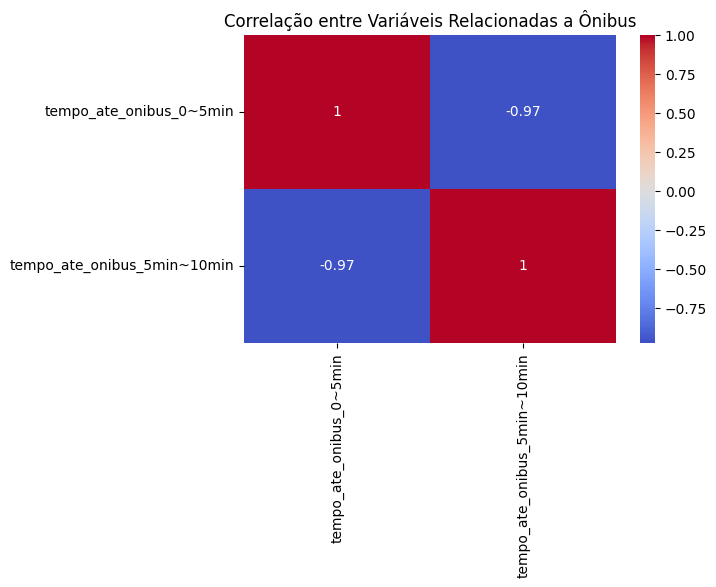

In [ ]:
# Verificar a correlação entre as variáveis relacionadas a ônibus
corr_onibus = df[['tempo_ate_onibus_0~5min', 'tempo_ate_onibus_5min~10min']].corr()
print(corr_onibus)

# Visualizar a correlação
plt.figure(figsize=(6, 4))
sns.heatmap(corr_onibus, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre Variáveis Relacionadas a Ônibus')
plt.show()

## 8: Avalie e compare ambos os modelos e decida qual é melhor.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# R2 e R2 ajustado
print(f"Modelo1: R2 = {modelo1.rsquared}, R2 Ajustado = {modelo1.rsquared_adj}")
print(f"Modelo2: R2 = {modelo2.rsquared}, R2 Ajustado = {modelo2.rsquared_adj}")

Modelo1: R2 = 0.49850377056162654, R2 Ajustado = 0.49841861243130925
Modelo2: R2 = 0.8265485207255558, R2 Ajustado = 0.8261352598831728


**Análise:** O modelo2 tem um R² e R² Ajustado significativamente maiores do que o modelo simples (modelo1), indicando que ele explica uma maior proporção da variância nos dados.

In [ ]:
#MSE
from statsmodels.tools.eval_measures import mse

print(f"MSE Modelo1: {mse(y, res1)}")
print(f"MSE Modelo2: {mse(y, res2)}")

MSE Modelo1: 1964820940296.0916
MSE Modelo2: 2098454648018.7969


In [ ]:
#RMSE
from statsmodels.tools.eval_measures import rmse

print(f"RMSE Modelo1: {rmse(y, res1)}")
print(f"RMSE Modelo2: {rmse(y, res2)}")

RMSE Modelo1: 1401720.7069513141
RMSE Modelo2: 1448604.379400669


**Análise:** O modelo **simples (modelo1)** tem valores ligeiramente menores de MSE e RMSE, sugerindo que ele teve um desempenho melhor em termos de erro quadrático médio. Isso indica que o modelo simples erra menos, embora a diferença seja pouco expressiva.

In [ ]:
#MAE
from statsmodels.tools.eval_measures import meanabs

print(f'MAE Modelo1: {meanabs(y, res1)}')
print(f'MAE Modelo2: {meanabs(y, res2)}')

MAE Modelo1: 1338568.4516168616
MAE Modelo2: 1327392.9153251608


**Análise:**

O modelo **múltiplo (modelo2)** tem um MAE ligeiramente menor que o modelo simples (modelo1), indicando que ele tem um desempenho um pouco melhor em termos de erro absoluto médio.

**Resposta:**

**Resumo das Comparações:**
- **Modelo 2:**
  - Superior nas métricas R² e R² Ajustado.
  - Ligeiramente melhor na métrica MAE.

- **Modelo 1:**
  - Ligeiramente melhor nas métricas MSE e RMSE.

**Considerações Finais:**

- **Modelo Múltiplo (Modelo 2):**
  - **Recomendado** se a prioridade é capturar uma maior variância e obter previsões ligeiramente mais precisas em termos de erro absoluto médio (MAE).
  - Este modelo é mais robusto e leva em consideração múltiplos fatores que influenciam o preço.

- **Modelo Simples (Modelo 1):**
  - Pode ser uma boa escolha se a simplicidade e a facilidade de interpretação são importantes.
  - Indicado para conjuntos de dados limitados ou se houver preferência por um modelo com menor risco de overfitting.

**Conclusão:**
Dado que o objetivo é calcular o preço dos imóveis de forma precisa, o Modelo Múltiplo (Modelo 2) é ligeiramente preferível devido ao seu menor MAE e maior capacidade explicativa (maior R²).

# Regressão Linear com Sklearn

Agora vamos começar a pensar mais como modelos de Machine Learning, não como modelos estatísticos. Com o Sklearn vamos tentar fazer isso da forma mais rápida e eficiênte o possível!

## 9: Importe o Conjunto de dados "California Housing"


Este dataset pode ser baixado diretamente pelo Sklearn, para isto utilize o seguinte link da biblioteca como referência.

[California Housing SkLearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html?ref=hackernoon.com)


Sobre o Dataset:

#### Conjunto de Dados de Habitação da Califórnia

**Características do Conjunto de Dados:**

- **Número de Instâncias:** 20640
- **Número de Atributos:** 8 atributos numéricos e preditivos, além do alvo

**Informações dos Atributos:**

- **MedInc:** Renda mediana no grupo de blocos
- **HouseAge:** Idade mediana das casas no grupo de blocos
- **AveRooms:** Número médio de cômodos por domicílio
- **AveBedrms:** Número médio de quartos por domicílio
- **Population:** População do grupo de blocos
- **AveOccup:** Número médio de membros por domicílio
- **Latitude:** Latitude do grupo de blocos
- **Longitude:** Longitude do grupo de blocos

**Valores de Atributos Faltantes:**
Nenhum

Este conjunto de dados foi obtido do repositório StatLib: [StatLib Repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).

A variável alvo é o valor mediano das casas (`medianHouseValue`/ `target`) nos distritos da Califórnia, expressa em centenas de milhares de dólares (US$ 100,000).

Este conjunto de dados foi derivado do censo dos EUA de 1990, utilizando uma linha por grupo de blocos do censo. Um grupo de blocos é a menor unidade geográfica para a qual o Bureau do Censo dos EUA publica dados amostrais (um grupo de blocos geralmente tem uma população de 600 a 3.000 pessoas).

Um domicílio é um grupo de pessoas que residem em uma casa. Como o número médio de cômodos e quartos neste conjunto de dados é fornecido por domicílio, essas colunas podem apresentar valores surpreendentemente altos para grupos de blocos com poucos domicílios e muitas casas vazias, como resorts de férias.

Ele pode ser baixado/carregado usando a função `sklearn.datasets.fetch_california_housing`.




In [ ]:
# já vou deixar o seguinte código para direcionar.
from sklearn.datasets import fetch_california_housing

Faça a chamada da função utilizando o parametro `as_frame`, para facilitar a manipulação:

`fetch_california_housing(as_frame=True)`

In [ ]:
# Carrega o dataset
cal_housing = fetch_california_housing(as_frame=True)

# Obtém o DataFrame
df_cal_housing = cal_housing.frame

# Visualiza as primeiras linhas do DataFrame
df_cal_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df_cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 10: Utilizando Regressão Linear do Sklearn, treino um modelo para prever o preços médios das casas

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

**Comentário:** após a criação do modelo e executá-lo uma primeira vez, a variável X5 (population) apresentou p-valor alto,  por essa razão, será removida do modelo para avaliar o resultado.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Separar as variáveis independentes X e a variável dependente y
X_cal_housing = df_cal_housing.drop(columns=['MedHouseVal', 'Population'])
y_cal_housing = df_cal_housing['MedHouseVal']

# Aplicar o StandardScaler em X
scaler = StandardScaler()
X_cal_housing_scaled = scaler.fit_transform(X_cal_housing)

# Ajustar o modelo linear
X_cal_housing_scaled_with_const = sm.add_constant(X_cal_housing_scaled)
modelo_linear = sm.OLS(y_cal_housing, X_cal_housing_scaled_with_const).fit()

# Previsões para o modelo linear
y_linear_pred = modelo_linear.predict(X_cal_housing_scaled_with_const)

# Avaliar o modelo linear
mse_linear = mean_squared_error(y_cal_housing, y_linear_pred)
r2_linear = r2_score(y_cal_housing, y_linear_pred)

print("Linear Model")
print(modelo_linear.summary())

Linear Model
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:25:32   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0686      0.005    410

In [ ]:
# Verificando os pressupostos do modelo

from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Resíduos do modelo linear
res_linear = y_cal_housing - y_linear_pred

# Teste de Shapiro-Wilk para normalidade
shapiro_test = shapiro(res_linear)
print('Shapiro-Wilk Teste (Modelo Linear)')
print(f'Estatística: {shapiro_test[0]}, p-valor: {shapiro_test[1]}')

# Teste de Durbin-Watson para autocorrelação
dw_test = durbin_watson(res_linear)
print('Durbin-Watson Teste (Modelo Linear)')
print(f'Estatística: {dw_test}')

# Teste de Goldfeld-Quandt para heterocedasticidade (Modelo Linear)
gq_test_linear = het_goldfeldquandt(res_linear, X_cal_housing_scaled_with_const)
print('Goldfeld-Quandt Teste (Modelo Linear)')
print(f'Estatística: {gq_test_linear[0]}, p-valor: {gq_test_linear[1]}, Alternativa: {gq_test_linear[2]}')

Shapiro-Wilk Teste (Modelo Linear)
Estatística: 0.9228456020355225, p-valor: 0.0
Durbin-Watson Teste (Modelo Linear)
Estatística: 0.8852035008140087
Goldfeld-Quandt Teste (Modelo Linear)
Estatística: 0.8838650726763769, p-valor: 0.9999999998147261, Alternativa: increasing


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Resposta:**

**Resumo dos Pressupostos do Primeiro Modelo:**

- **Normalidade dos Resíduos:**
  - Os resíduos do modelo linear não são normalmente distribuídos, violando um dos pressupostos da regressão linear.

- **Autocorrelação dos Resíduos:**
  - Existe autocorrelação positiva nos resíduos, o que também representa uma violação dos pressupostos da regressão linear.

- **Heterocedasticidade dos Resíduos:**
  - Não há evidência de heterocedasticidade, portanto, este pressuposto é atendido.

**Conclusão:**
O primeiro modelo apresenta violações nos pressupostos de normalidade e autocorrelação dos resíduos, mas atende ao pressuposto de homocedasticidade. Essas violações devem ser levadas em consideração ao interpretar os resultados e podem requerer ajustes no modelo ou a utilização de métodos robustos.

## 11: Utilize o PolynomialFeatures para gerar features polinomiais. Treine um novo modelo.


A Ideia aqui é criar um novo modelo, com a ideia da Regressão Linear Polinomial vista em aula. Crie este modelo com um nome diferente do criado na questão anterior

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Gerar Polynomial Features de grau 2
# include_bias=False porque estamos aplicando StandardScaler antes de gerar as características polinomiais

poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X_cal_housing_scaled)

# Ajustar o modelo polinomial
modelo_poly = LinearRegression()
modelo_poly.fit(X_poly, y_cal_housing)

# Fazer previsões
y_poly_pred = modelo_poly.predict(X_poly)

# Avaliar o modelo polinomial
mse_poly = mean_squared_error(y_cal_housing, y_poly_pred)
r2_poly = r2_score(y_cal_housing, y_poly_pred)

In [ ]:
# Teste de Shapiro-Wilk para normalidade
shapiro_test_poly = shapiro(y_poly_pred)
print('Shapiro-Wilk Teste (Modelo Polinomial)')
print(f'Estatística: {shapiro_test_poly[0]}, p-valor: {shapiro_test_poly[1]}')

# Teste de Durbin-Watson para autocorrelação
dw_test_poly = durbin_watson(shapiro_test_poly)
print('Durbin-Watson Teste (Modelo Polinomial)')
print(f'Estatística: {dw_test_poly}')

# Teste de Goldfeld-Quandt para heterocedasticidade (Modelo Polinomial)
X_poly_with_const = sm.add_constant(X_poly)

gq_test_poly = het_goldfeldquandt(y_poly_pred, X_poly_with_const)
print('Goldfeld-Quandt Teste (Modelo Polinomial)')
print(f'Estatística: {gq_test_poly[0]}, p-valor: {gq_test_poly[1]}, Alternativa: {gq_test_poly[2]}')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Teste (Modelo Polinomial)
Estatística: 0.970526397228241, p-valor: 0.0
Durbin-Watson Teste (Modelo Polinomial)
Estatística: 1.0
Goldfeld-Quandt Teste (Modelo Polinomial)
Estatística: 0.0944908837834939, p-valor: 0.9999999999999999, Alternativa: increasing


**Resposta:**

**Resumo dos Pressupostos do Segundo Modelo:**

- **Normalidade dos Resíduos:**
  - Os resíduos do modelo polinomial não seguem uma distribuição normal, violando o pressuposto de normalidade. No entanto, a distribuição dos resíduos é mais próxima da normalidade comparada ao modelo linear.

- **Autocorrelação dos Resíduos:**
  - Existe alguma autocorrelação positiva nos resíduos, mas é menos acentuada do que no modelo linear.

- **Heterocedasticidade dos Resíduos:**
  - Não há evidência de heterocedasticidade, indicando que este pressuposto é atendido.

**Comparação dos Resultados dos Pressupostos entre os Dois Modelos:**

O modelo polinomial mostra melhorias em relação ao modelo linear, especialmente na redução da autocorrelação dos resíduos.

## 12:  Utilize alguma das métricas de Regressão para comparar os modelos e dizer qual obteve uma performance melhor. Caso possível tente explicar o motivo.

In [ ]:
# Resíduos dos modelos
res_linear = y_cal_housing - y_linear_pred
res_poly = y_cal_housing - y_poly_pred

A distribuição dos resíduos do modelo polinomial é bem centralizada, variando entre -2 e 2. Em contraste, os resíduos do modelo linear simples estão mais concentrados à esquerda, entre 0 e -2.

Essa configuração sugere que o modelo polinomial se ajusta melhor aos dados em comparação ao modelo linear simples.

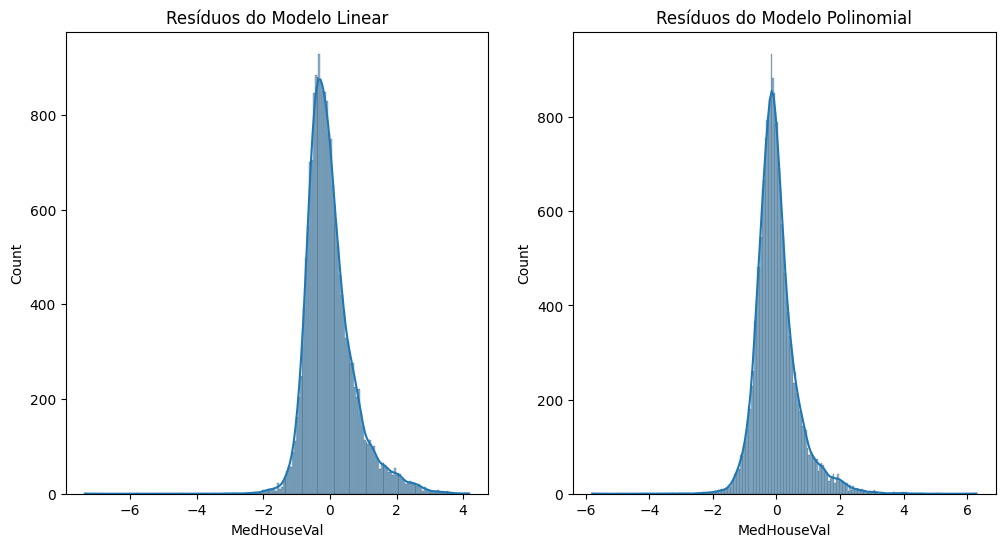

In [ ]:
# Plotar histogramas dos resíduos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(res_linear, kde=True)
plt.title("Resíduos do Modelo Linear")

plt.subplot(1, 2, 2)
sns.histplot(res_poly, kde=True)
plt.title("Resíduos do Modelo Polinomial")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [ ]:
# Calcular R² Ajustado
n = len(y_cal_housing)
p_linear = X_cal_housing.shape[1]
p_poly = X_poly.shape[1]

r2_adj_linear = 1 - (1 - r2_linear) * (n - 1) / (n - p_linear - 1)
r2_adj_poly = 1 - (1 - r2_poly) * (n - 1) / (n - p_poly - 1)

# Calcular RMSE
rmse_linear = np.sqrt(mse_linear)
rmse_poly = np.sqrt(mse_poly)

# Calcular MAE
mae_linear = mean_absolute_error(y_cal_housing, y_linear_pred)
mae_poly = mean_absolute_error(y_cal_housing, y_poly_pred)

# Exibir os resultados
print("Linear Model")
print("R²:", r2_linear)
print("R² Ajustado:", r2_adj_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("MAE:", mae_linear)

print("\nPolynomial Model")
print("R²:", r2_poly)
print("R² Ajustado:", r2_adj_poly)
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("MAE:", mae_poly)

Linear Model
R²: 0.6062193051855558
R² Ajustado: 0.6060857037478037
MSE: 0.5243388023465959
RMSE: 0.7241124238311313
MAE: 0.5311838798132957

Polynomial Model
R²: 0.6747848212172742
R² Ajustado: 0.6742323784266804
MSE: 0.43304036889929715
RMSE: 0.6580580285197477
MAE: 0.4678858805300057


**Resposta:**

**Comparação das Métricas dos Modelos**

- **R² e R² Ajustado:**
  - O modelo polinomial apresenta valores mais altos de R² e R² ajustado em comparação ao modelo linear, indicando uma maior capacidade de explicar as variações nos preços das casas.

- **MSE e RMSE:**
  - O modelo polinomial possui valores menores de MSE e RMSE do que o modelo linear, sugerindo que os erros nas previsões são menores.

- **MAE:**
  - O modelo polinomial também tem um MAE mais baixo, mostrando que os erros absolutos médios são menores.

**Conclusão**

O modelo polinomial de grau 2 se ajusta melhor aos dados do que o modelo linear simples pelas seguintes razões:

- Explica uma parte maior da variação nos preços das casas, como demonstrado pelos valores mais altos de R² e R² ajustado.
- Apresenta menores erros nas previsões, conforme indicado pelos menores valores de MSE, RMSE e MAE.

Portanto, com base nas métricas analisadas, podemos concluir que o modelo de regressão polinomial é mais apropriado para prever os preços médios das casas no conjunto de dados.